## Bank Marketing
### Introduction
This dataset is based on the bank marketing

It contains information about the marketing campaign impact of a bank specifically through telemarketing. It includes 20 independent variables of which 5 are the nationwide socio - economic factors pertaining to the bank's operating country.

The classification goal is to predict if the client will subscribe a term deposit variable 'y'

Variables Information 

| **Variable**  | **Type**  | **Information**  |
|- |-|-|
| **age**  | numeric  | age of the client |
| **job**  | categorical  | type of job ('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| **marital**  | categorical  | marital status ('divorced','married','single'; note: 'divorced' means divorced or widowed)  |
| **education**  | categorical  | education details ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  |
| **default**  | categorical  | does the customer have credit in default ('no','yes') |
| **balance**  | numeric  | have balance   |
| **housing**  | categorical  | has house has loan ('no','yes') |
| **loan**  | categorical  | has personal loan ('no','yes') |
| **contact**  | categorical  | communication type ('cellular','telephone','unknown')  |
| **day**  | categorical  | last contact day of week ('mon','tue','wed','thu','fri') |
| **month**  | categorical  | last contact month ('jan', 'feb', 'mar', ..., 'nov', 'dec') |
| **duration**  | numeric  | last contact duration (in sec)  |
| **campaign**  | numeric  | numbers of contact performed  |
| **pdays**  | numeric  | days passed after last contact  |
| **previous**  | numeric  | number of contacts performed before campaign  |
| **poutcome**  | categorical  | outcome of previous marketing campaign  ('failure','nonexistent','success','unknown') |
| **y**  | categorical  | has the client subscribed a term deposit ('yes','no') |


Numeric Variables     : 6 

Categorical Variables : 11

# job          12
# education     4
# contact       3
# poutcome      4


In [19]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [20]:
bank = pd.concat((pd.read_csv(r'C:\Users\ASUS\Desktop\python\dataset\odin_school\EDA\datasets\test.csv', sep=';'), pd.read_csv(r'C:\Users\ASUS\Desktop\python\dataset\odin_school\EDA\datasets\train.csv', sep=';')), ignore_index=True)

In [21]:
bank.shape

(49732, 17)

In [22]:
print('Number of observations : ', bank.shape[0])
print('Number of variables       : ', bank.shape[1])

Number of observations :  49732
Number of variables       :  17


In [23]:
# getting glimpse of data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [24]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
49731,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [40]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [41]:
bank.describe(include='category')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,3009,15164,40664,43922


In [26]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [27]:
# changing data types of wrong read variables
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y','day','month']
bank[cat_col]=bank[cat_col].astype('category')

In [28]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  category
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.8 MB


In [29]:
num_col = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [30]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

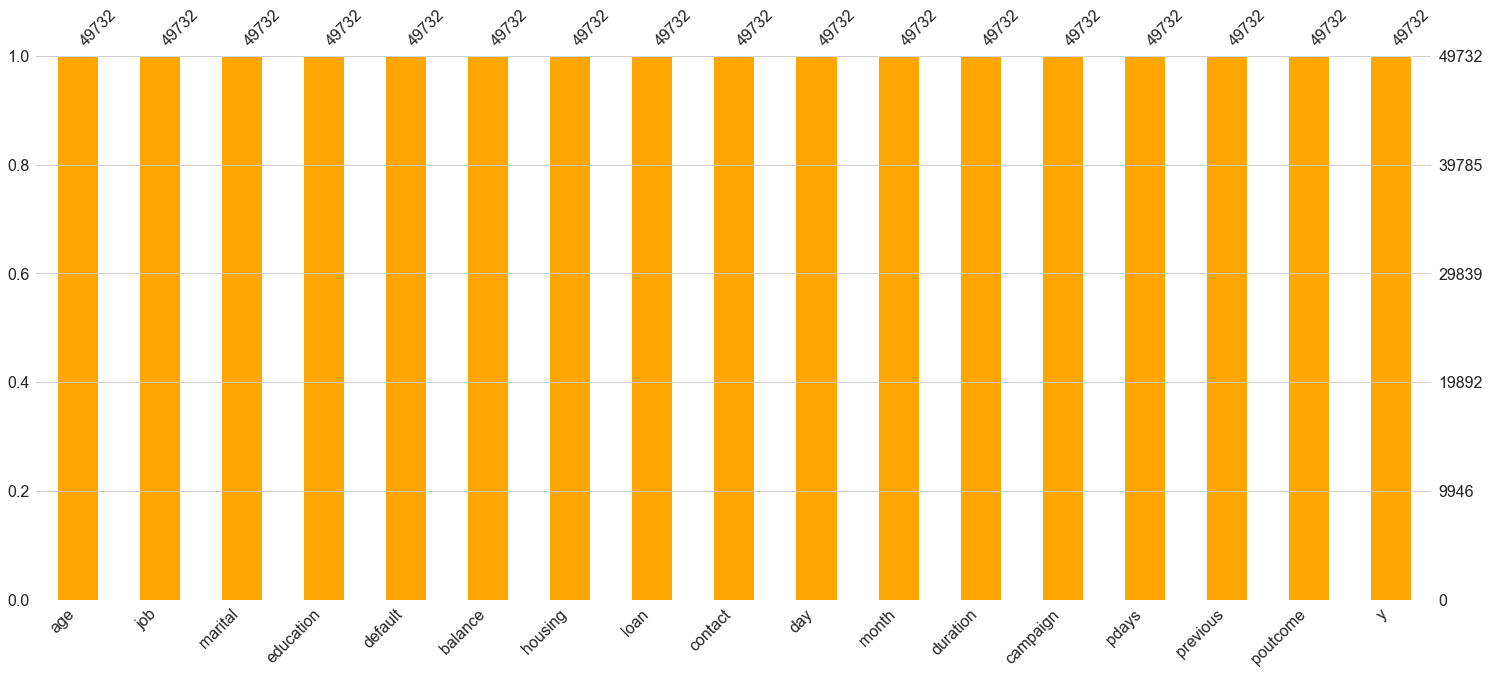

In [31]:
msno.bar(bank, color='orange')
plt.show()

In [42]:
bank[cat_col].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
poutcome      4
y             2
day          31
month        12
dtype: int64

In [33]:
bank[num_col].nunique()

age           77
balance     7168
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

### Distribution of categorical variables

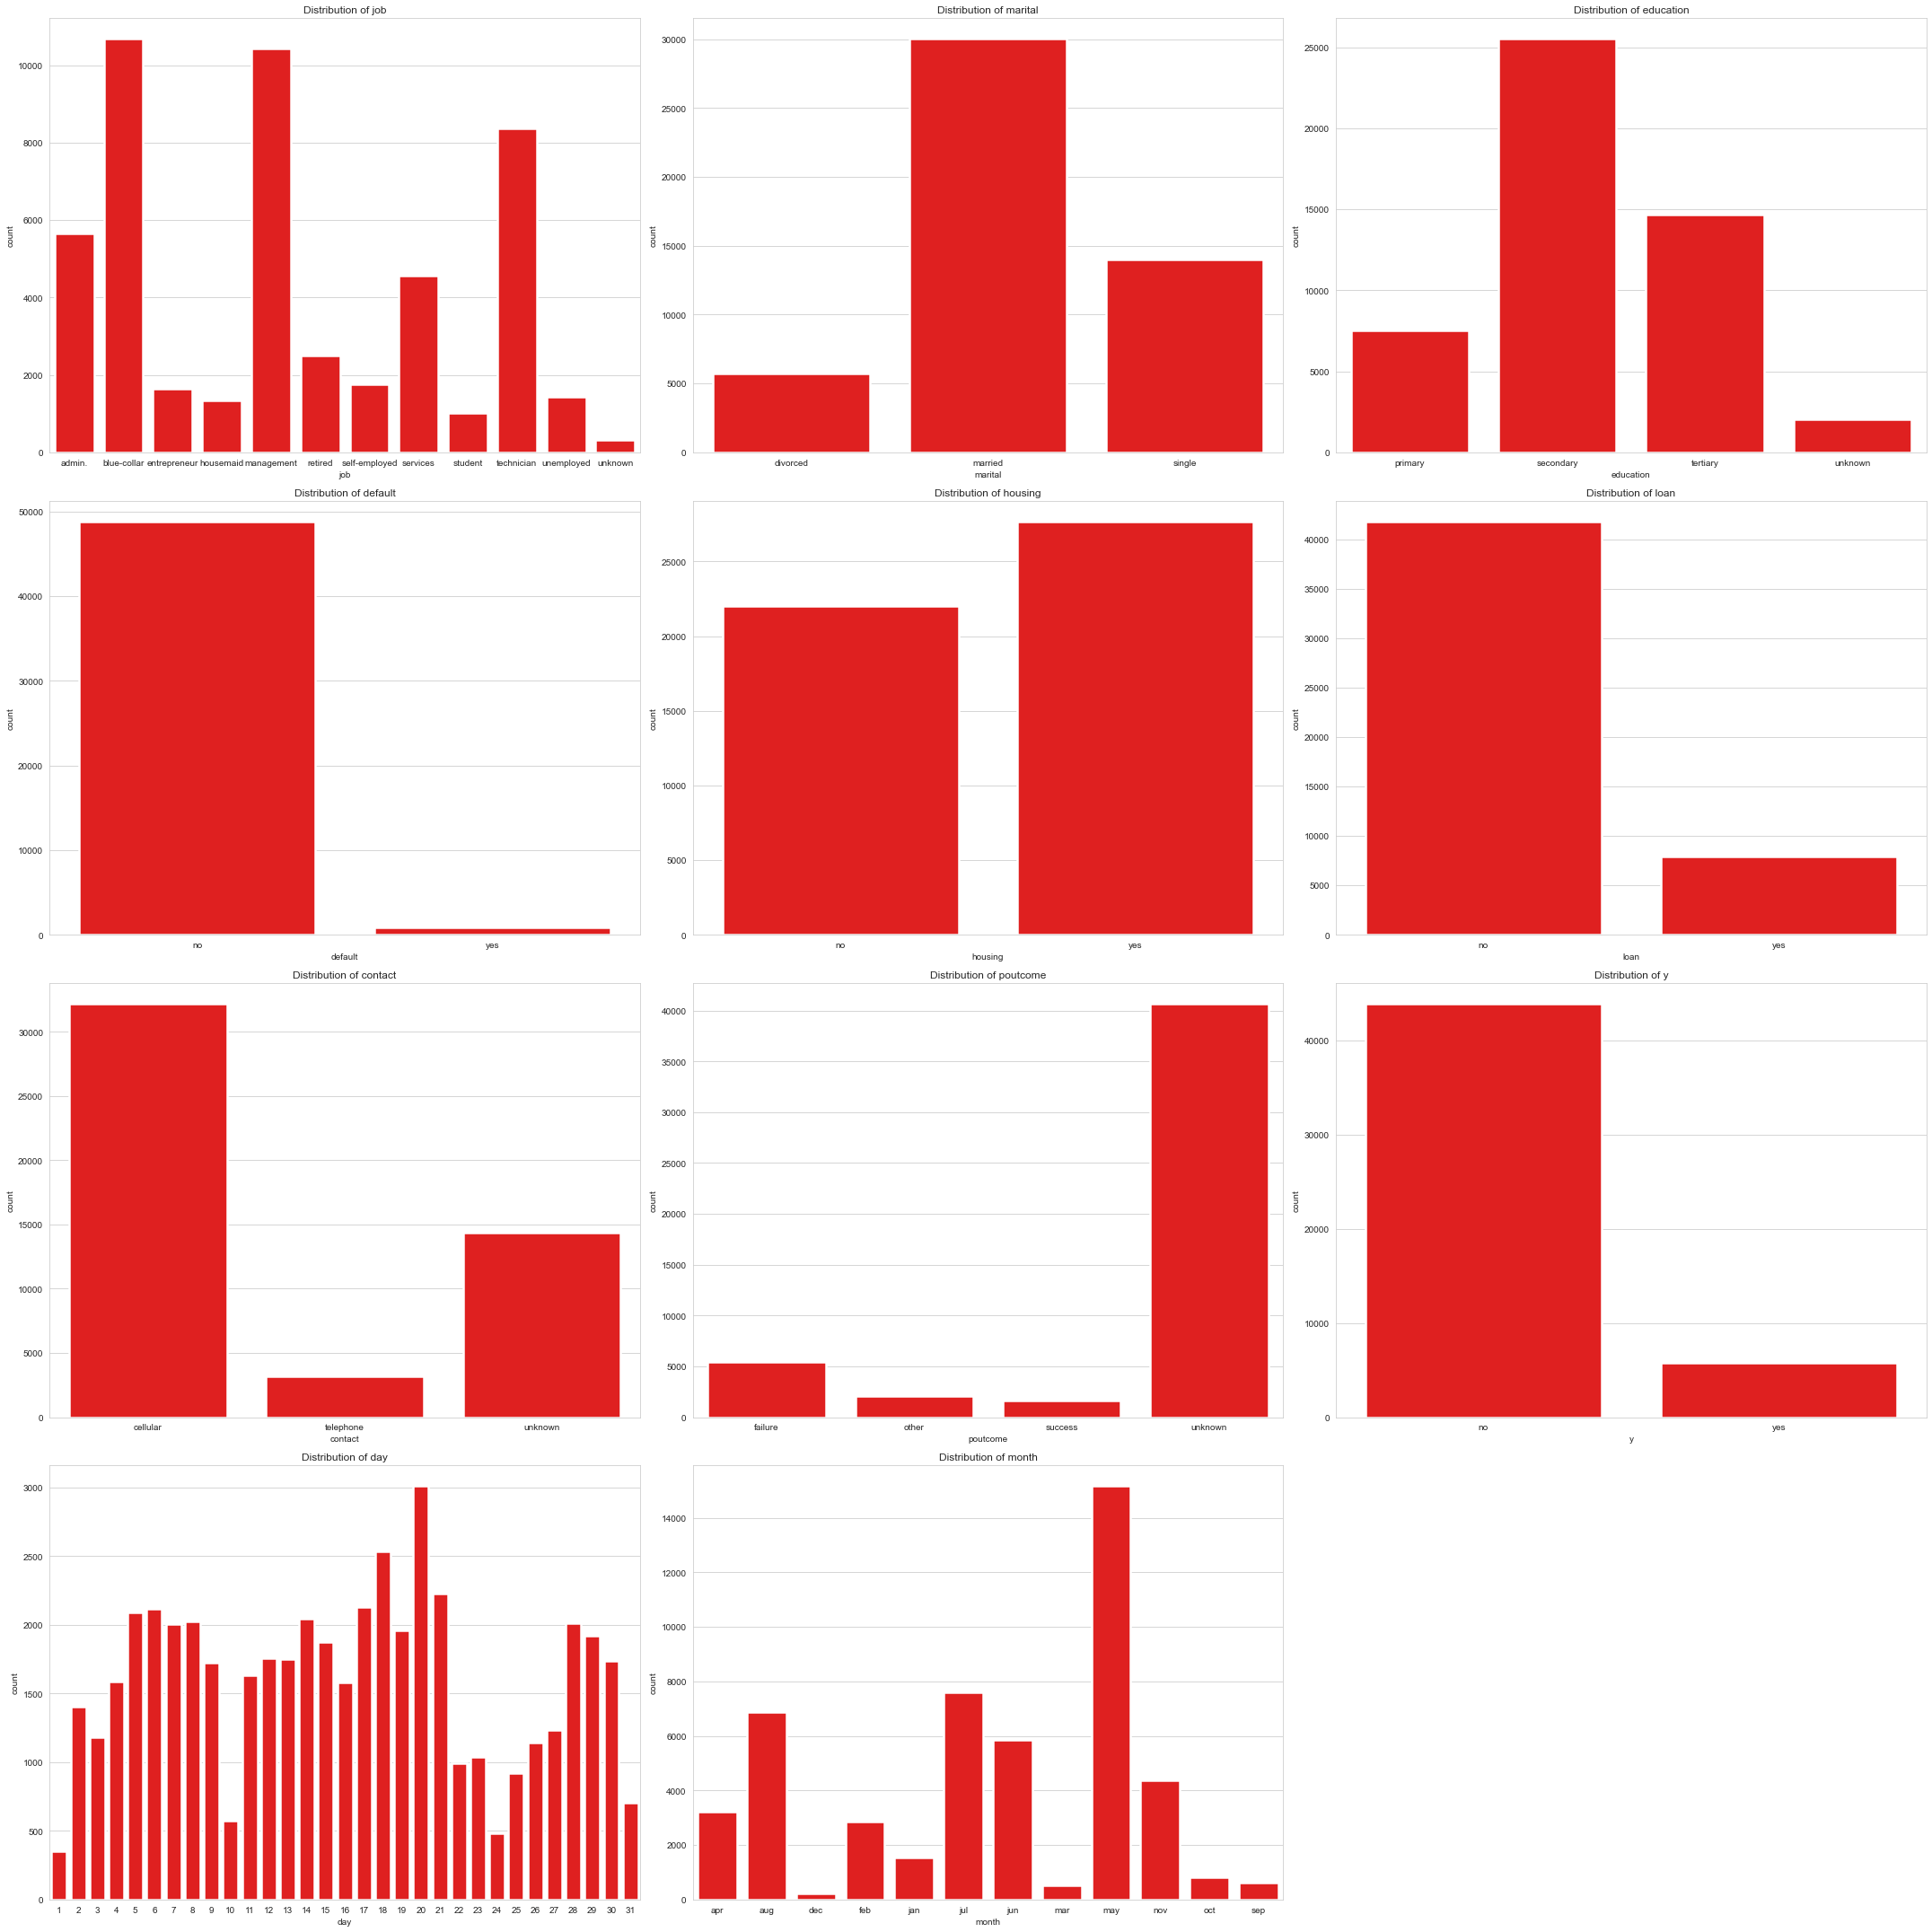

In [34]:
sns.set_style('whitegrid')
count=1
plt.subplots(figsize=(30, 30))
for i in cat_col:
    plt.subplot(4,3,count)
    ax = plt.gca()
    sns.countplot(data=bank,x=i, linewidth=2.5,color='r')
    ax.set_title(f'Distribution of {i}')
    count+=1 
    plt.tight_layout()
plt.show()

### Distribution of Numeric variables


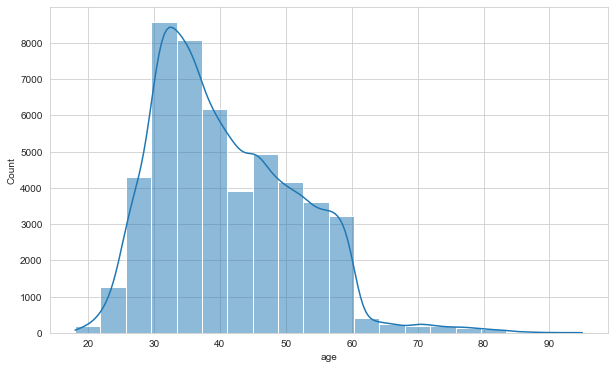

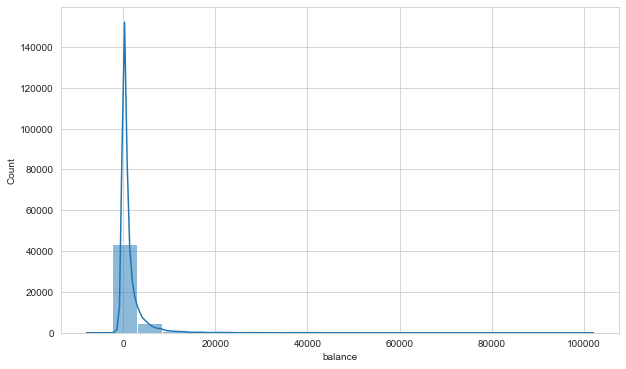

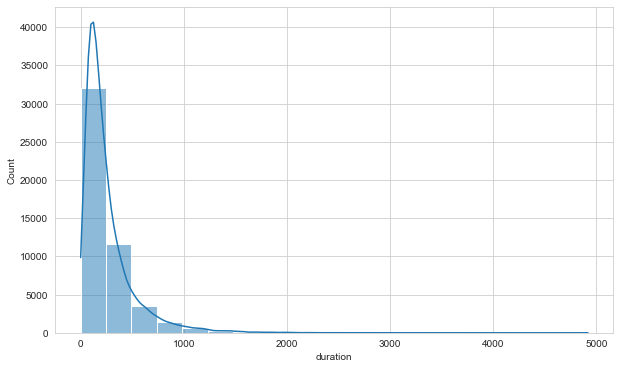

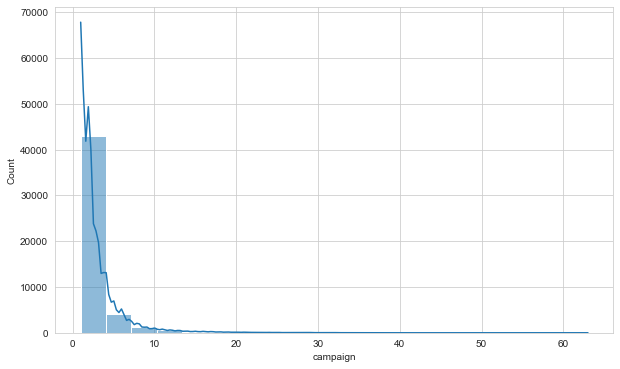

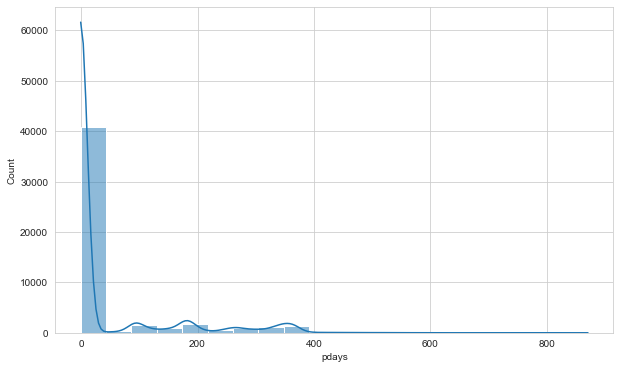

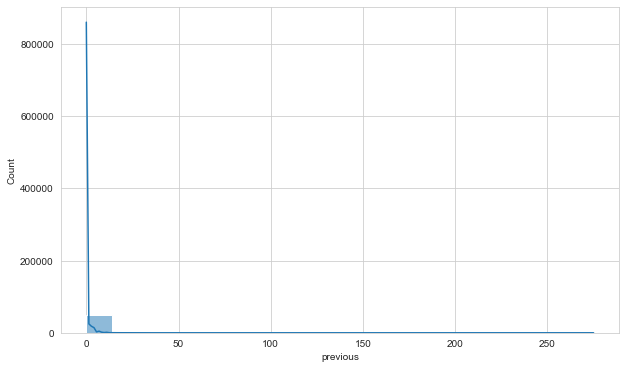

In [35]:
for i in num_col:
    plt.figure(figsize=(10,6))
    sns.histplot(data=bank,x=i,bins = 20, kde=True)
    plt.show

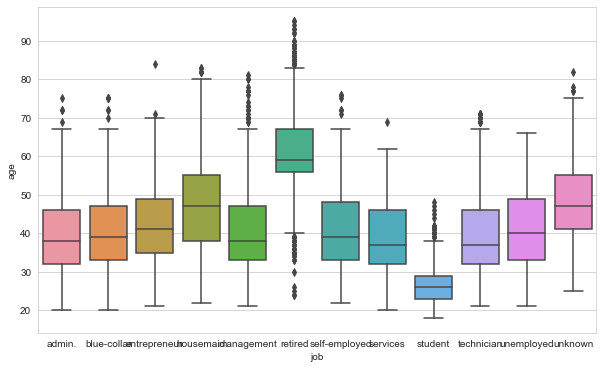

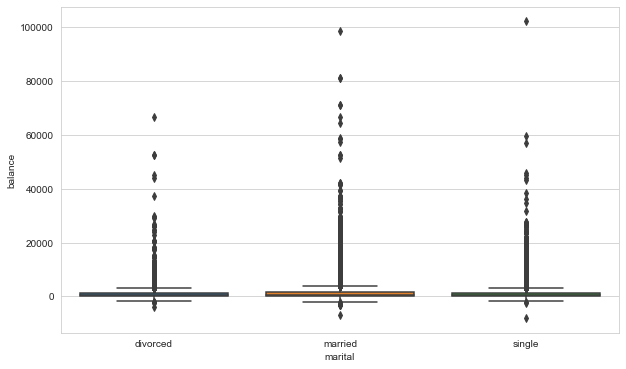

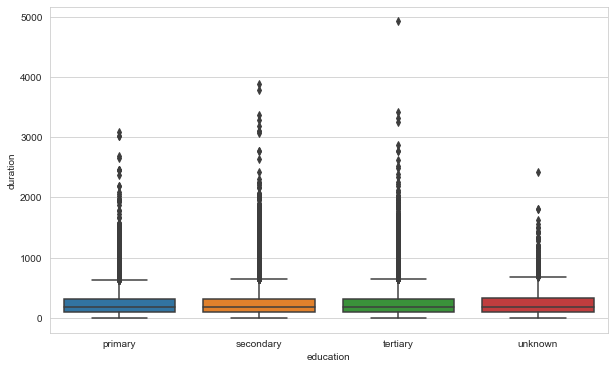

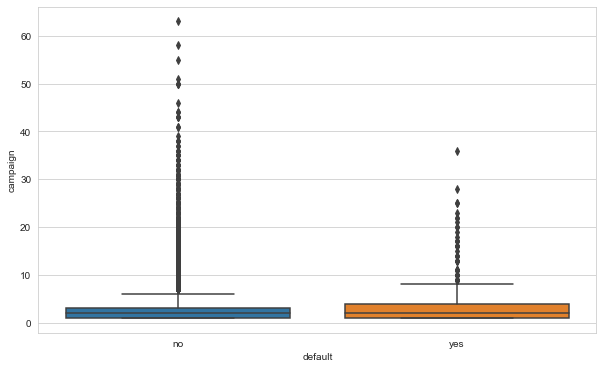

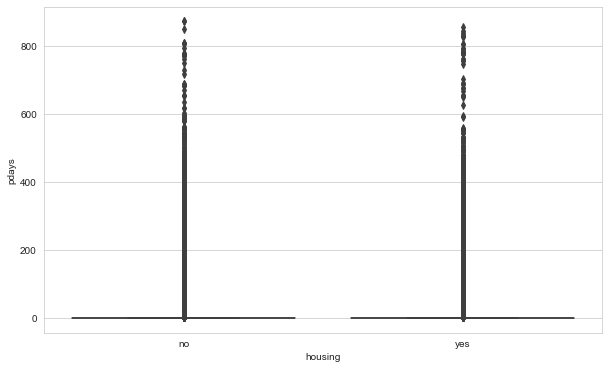

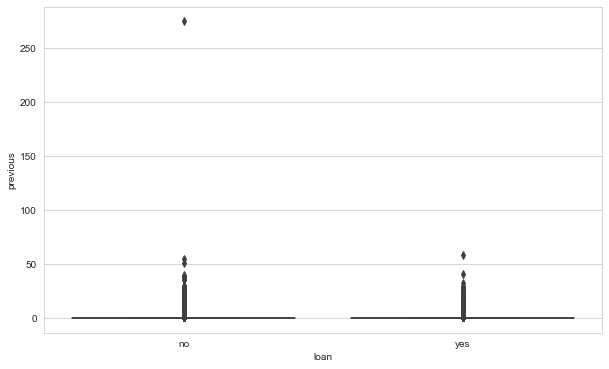

In [47]:
for i,j in zip(cat_col,num_col):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=bank, x=i, y=j)
    plt.show()

### Distribution of Social variables with respect to term deposit


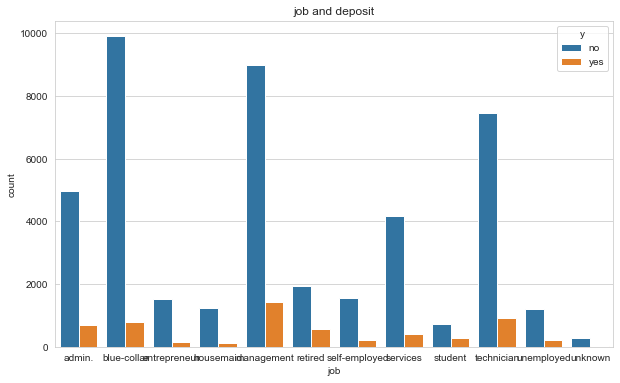

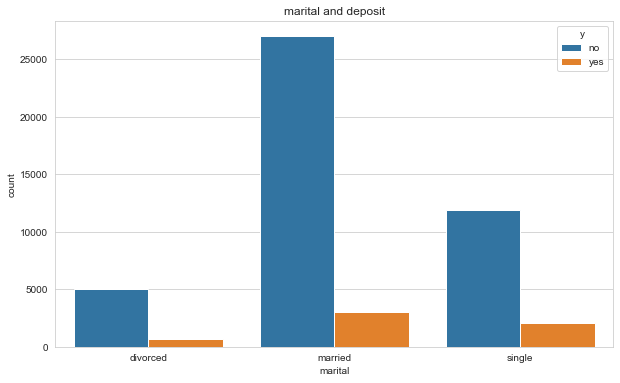

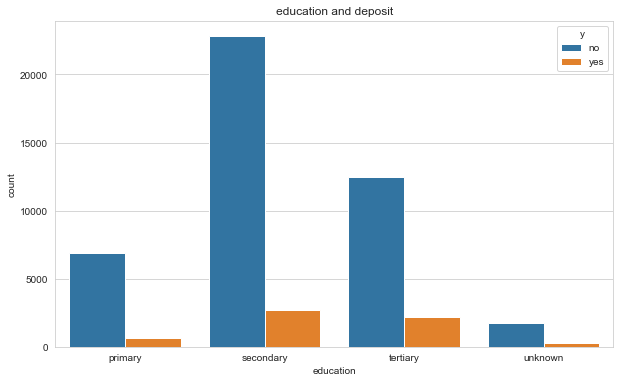

In [36]:
social = ['job', 'marital', 'education']
for i in social:
    plt.figure(figsize=(10,6))
    sns.countplot(data=bank, x=i, hue='y')
    plt.title(f'{i} and deposit')
    plt.show()

- Clients with blue collar, management, technician are less likely to subscribe for term deposit
- Married clients are less likely to subscribe for term deposit
- Secondary educated clients are less likely to subscribe for term deposit

In [57]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
49728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN
49729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN


In [82]:
have_unknown=['job', 'marital', 'education', 'default','housing','loan']
for i in have_unknown:
    print(bank[i].value_counts())
    print()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

no     48841
yes      891
Name: default, dtype: int64

yes    27689
no     22043
Name: housing, dtype: int64

no     41797
yes     7935
Name: loan, dtype: int64



In [90]:
bank['contact'].value_counts()

cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64